<a href="https://colab.research.google.com/github/StellaMoral77/03MIAR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG2_Stella_Moral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Stella Moral Salguero <br>
Link:   https://colab.research.google.com/drive/1F5v9e0lUxJ26PYFniFSIul9T6O7v7DW3?usp=sharing <br>
Github: https://github.com/StellaMoral77/03MIAR---Algoritmos-de-Optimizacion
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

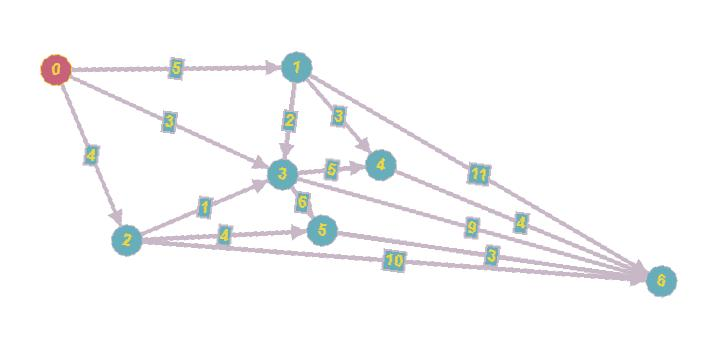

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,999,999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 para que el coste sea tan alto que no quiera coger esa solucion
TARIFAS

[[0, 5, 4, 3, 999, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################  
def Precios(TARIFAS):
################################################################ 
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  # i representa el nodo 'desde' , j representa el nodo 'hasta', k representa los valores intermedios
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 5,6) 


La ruta es:


5

Tal y como podemos apreciar en el gráfico inicial, la mejor ruta a efectos del coste para ir del nodo 0 al nodo 6 es seguir la ruta 0-2-5 con un coste de 11.
El caso de ir de 0 a 6 es la ruta más larga posible. Sin embargo, este código también permite calcular rutas no tan lejanas, por ejemplo, la mejor ruta para ir de 0 a 5 que es pasar por el nodo 2 cuyo coste es 8. Así, para ir de 5 a 6 el algoritmo nos dice que la mejor opción es ir de forma directa, que es la mejor opción. Por ende, se concluye que este algoritmo cumple con el **principio de optimalidad de Bellman** dado que toda sub-secuencia también es óptima. 

La complejidad computacional es polinominal, del orden de O (n^3).

##Problema de Asignacion de tarea

Consiste en maximizar el rendimiento (o minimizar los costes) en cuanto a la asignación de N tareas a N agentes. Cada tarea solo puede ser asignado a un agente.

Los beneficios que se obtienen al realizar la tarea 1 por el agente A en este caso es 11.

La matriz de beneficios es la que se muestra a continuación.

Si lo aplicáramos por fuerza bruta, la complejidad es de O (n!) por lo que para valores pequeños, por ejemplo, n = 4 se obtendrían 24 posibles soluciones. Por ello, para tamaños grandes, resolver este problema por fuerza bruta no es una buena opción dado que se realizarían cantidades enormes de operaciones.

**¿ Qué estructura de datos sería adecuada para manejar todas las posibles soluciones?**

La manera de ir construyendo las soluciones puede ser una lista. Con la técnica de ramificación y poda se pueden construir las cotas inferiores y superiores.

**¿Cómo expandimos los nodos?**

Viendo las posibles soluciones y creando nodos 'hijos' posibles.

**¿Cómo podamos?**

Eliminamos las ramas imposibles, por ejemplo cuando ese agente ya ha sido utilizado, o ramas que vemos que la solución no puede darnos el mejor resultado.

El coste computacional del problema de asignación de tareas utilizando la técnica de Ramificación y Poda depende del tamaño del problema y de la implementación específica utilizada. En general, el coste computacional puede ser considerado como O(b^m), donde b es el número promedio de ramas generadas en cada nivel de profundidad en el árbol de búsqueda y m es la profundidad máxima del árbol. Sin embargo, la técnica de Ramificación y Poda también puede reducir significativamente el número de ramas generadas y, por lo tanto, reducir el coste computacional en comparación con una búsqueda exhaustiva.

En general, el orden de complejidad suele ser exponencial.

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]
        

In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
#Esta función permite ir creando el árbol de expansión
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )

ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


# Ramificación y Poda. Práctica.
Análisis para mejorar nota:
- Generar matrices con valorea aleatorios de mayores dimensiones (5,6,7,..) y ejecutar ambos algoritmos.

- ¿A partir de qué dimensión el algoritmo por fuerza bruta deja de ser una opción?

- ¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda también deja de ser una opción válida?

Para resolver el segundo punto, se representa en una gráfica la función n! que es la que representa a la complejidad computacional de resolver este problema por fuerza bruta.

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]


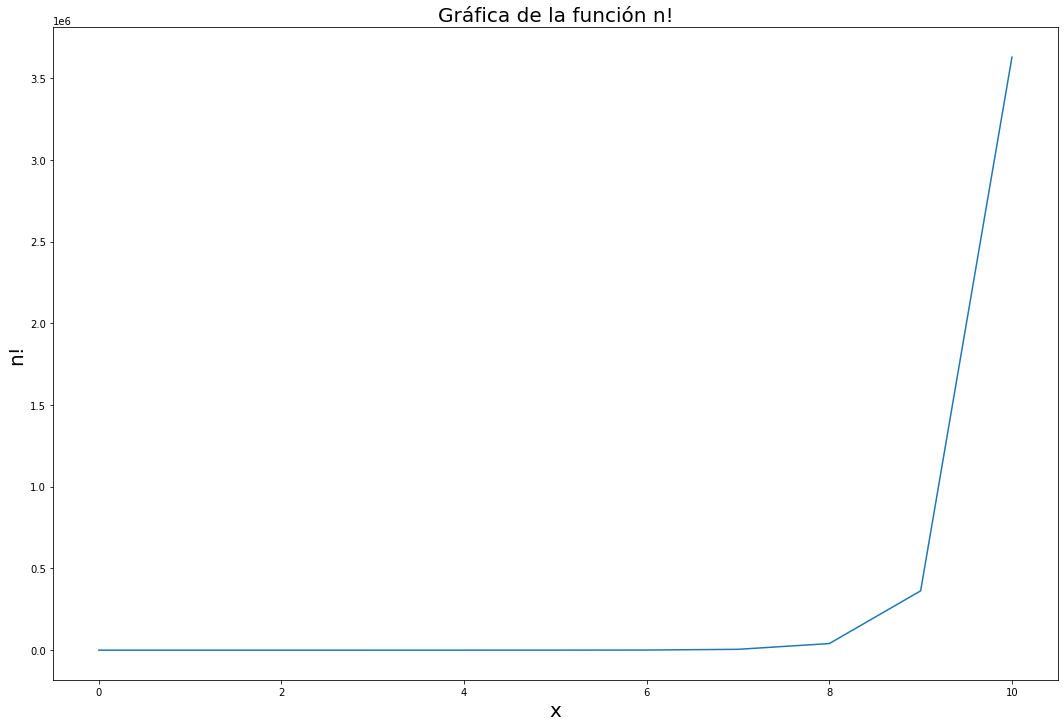

In [ ]:
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [18, 12]

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

x = range(0,11)
y = [factorial(i) for i in x]
print(y)
plt.plot(x, y)
plt.xlabel('x', fontsize = 20)
plt.ylabel('n!', fontsize = 20)
plt.title('Gráfica de la función n!', fontsize = 20)


plt.show()


Como podemos comprobar tanto en la gráfica como en el vector que se imprime ( [1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800] ). El coste computacional a partir de 4 agentes ya pasa de las 100 operaciones, llegando incluso a las 3.628.800 operaciones para 10 agentes. 

Por ende, se concluye que el algoritmo por fuerza bruta deja de ser útil muy pronto, en mi opinión a partir de 4 agentes dejaría de considerar esta opción.

Para resolver el primer apartado se generan matrices de dimensiones 5,6,7,8,9 y 10 agentes gracias a la librería *Numpy de Python*. En este caso se han acotado que los costes sean de 0 a 20, pero se podría extender a cualquier número que se necesitara simplemente cambiando el parámetro mayor_coste.

In [ ]:
import numpy as np

mayor_coste = 20
# Generar matriz aleatoria de dimensión 5
costes_5 = np.random.randint(0,mayor_coste, size=(5,5))
# Generar matriz aleatoria de dimensión 6
costes_6 = np.random.randint(0,mayor_coste, size=(6,6))
# Generar matriz aleatoria de dimensión 7
costes_7 = np.random.randint(0,mayor_coste, size=(7,7))
# Generar matriz aleatoria de dimensión 8
costes_8 = np.random.randint(0,mayor_coste, size=(8,8))
# Generar matriz aleatoria de dimensión 9
costes_9 = np.random.randint(0,mayor_coste, size=(9,9))
# Generar matriz aleatoria de dimensión 10
costes_10 = np.random.randint(0,mayor_coste, size=(10,10))
# Imprimimos las matrices resultantes
print(costes_5)
print(costes_6)
print(costes_7)
print(costes_8)
print(costes_9)
print(costes_10)


[[18 18 12 11 18]
 [10  3  6  9  6]
 [14  4 12 15 19]
 [13 19 12 12 19]
 [14  5 13  6 13]]
[[15 18  2 12  9  5]
 [ 1  4  7  2  4  6]
 [17  9  0  5  0  2]
 [17 10 17 13  3  9]
 [12 18  2 14  0 18]
 [11 12  3 15  3 16]]
[[ 9 18 16  5  9 17  1]
 [ 0 15  7  9  8 12 12]
 [ 2  5 18 18  8  1  4]
 [17 18 15  4 18  5  2]
 [ 5  1  6  9  8  3 11]
 [ 6 19 12  5  7 19 19]
 [ 7 10  3 11  1 10  0]]
[[ 0 14 10  8  9 13 10  7]
 [17  1  9  1 16 10  1  1]
 [ 0 10 14 13  5  4  1  4]
 [ 9 15 15  1 14  9  9 14]
 [12 14  4 16  1 19 15 13]
 [ 7  0 12 14 19 13 18 16]
 [ 6 11  7 14 15 13 10  7]
 [10  3  2 11  8 15  1  3]]
[[12  6  9 11 11 10  2 14 16]
 [14 12 15 10  1 12 15  5 19]
 [13  9  2  1  4  9  9 12 12]
 [15 15  2  6  2  0  0 17  4]
 [ 2 15 10 13 15 15  4 11 10]
 [12  1  7  4  8 19 19 10 13]
 [ 5  8 11  0  4  7  0  5 16]
 [16  0  1  3 16  3 18 19 19]
 [ 1 11  3  2 12  2  8  5  0]]
[[ 4 12 10  4 16 12 14 17  0 15]
 [ 5  2 19  6  7 12  7  8  6  0]
 [ 3  3 13  1  6  8  3 15 13  3]
 [ 6  7 10 12 10  7 17  5 

In [ ]:
#Aplicamos el algoritmo por fuerza bruta.

In [ ]:
#CASO DIMENSIÓN 5 
import numpy as np
import itertools

# Matriz de costos
mayor_coste = 20
costes_5 = np.random.randint(0,mayor_coste, size=(5,5))

# Funcion para calcular el costo total de una asignacion dada
def costo_total(asignacion, costes):
    costo = 0
    for i, tarea in enumerate(asignacion):
        costo += costes[i][tarea]
    return costo

# Inicializar variables
mejor_asignacion = None
mejor_costo = float('inf')
iteraciones = 0

# Obtener todas las posibles combinaciones de asignaciones
for asignacion in itertools.permutations(range(5)):
    iteraciones += 1
    costo = costo_total(asignacion, costes_5)
    # Actualizar mejor asignacion si se encuentra una con menor costo
    if costo < mejor_costo:
        mejor_asignacion = asignacion
        mejor_costo = costo

# Imprimir resultado
print("Mejor asignacion:", mejor_asignacion)
print("Costo total:", mejor_costo)
print("Numero de iteraciones:", iteraciones)


Mejor asignacion: (3, 1, 0, 2, 4)
Costo total: 13
Numero de iteraciones: 120


In [ ]:
#CASO DIMENSIÓN 6 
import numpy as np
import itertools

# Matriz de costos
mayor_coste = 20
costes_6 = np.random.randint(0,mayor_coste, size=(6,6))

# Funcion para calcular el costo total de una asignacion dada
def costo_total(asignacion, costes):
    costo = 0
    for i, tarea in enumerate(asignacion):
        costo += costes[i][tarea]
    return costo

# Inicializar variables
mejor_asignacion = None
mejor_costo = float('inf')
iteraciones = 0

# Obtener todas las posibles combinaciones de asignaciones
for asignacion in itertools.permutations(range(6)):
    iteraciones += 1
    costo = costo_total(asignacion, costes_6)
    # Actualizar mejor asignacion si se encuentra una con menor costo
    if costo < mejor_costo:
        mejor_asignacion = asignacion
        mejor_costo = costo

# Imprimir resultado
print("Mejor asignacion:", mejor_asignacion)
print("Costo total:", mejor_costo)
print("Numero de iteraciones:", iteraciones)


Mejor asignacion: (4, 2, 0, 3, 5, 1)
Costo total: 8
Numero de iteraciones: 720


In [ ]:
#CASO DIMENSIÓN 7
import numpy as np
import itertools

# Matriz de costos
mayor_coste = 20
costes_7 = np.random.randint(0,mayor_coste, size=(7,7))

# Funcion para calcular el costo total de una asignacion dada
def costo_total(asignacion, costes):
    costo = 0
    for i, tarea in enumerate(asignacion):
        costo += costes[i][tarea]
    return costo

# Inicializar variables
mejor_asignacion = None
mejor_costo = float('inf')
iteraciones = 0

# Obtener todas las posibles combinaciones de asignaciones
for asignacion in itertools.permutations(range(7)):
    iteraciones += 1
    costo = costo_total(asignacion, costes_7)
    # Actualizar mejor asignacion si se encuentra una con menor costo
    if costo < mejor_costo:
        mejor_asignacion = asignacion
        mejor_costo = costo

# Imprimir resultado
print("Mejor asignacion:", mejor_asignacion)
print("Costo total:", mejor_costo)
print("Numero de iteraciones:", iteraciones)


Mejor asignacion: (4, 5, 0, 3, 1, 6, 2)
Costo total: 10
Numero de iteraciones: 5040


In [ ]:
#CASO DIMENSIÓN 8
import numpy as np
import itertools

# Matriz de costos
mayor_coste = 20
costes_8 = np.random.randint(0,mayor_coste, size=(8,8))

# Funcion para calcular el costo total de una asignacion dada
def costo_total(asignacion, costes):
    costo = 0
    for i, tarea in enumerate(asignacion):
        costo += costes[i][tarea]
    return costo

# Inicializar variables
mejor_asignacion = None
mejor_costo = float('inf')
iteraciones = 0

# Obtener todas las posibles combinaciones de asignaciones
for asignacion in itertools.permutations(range(8)):
    iteraciones += 1
    costo = costo_total(asignacion, costes_8)
    # Actualizar mejor asignacion si se encuentra una con menor costo
    if costo < mejor_costo:
        mejor_asignacion = asignacion
        mejor_costo = costo

# Imprimir resultado
print("Mejor asignacion:", mejor_asignacion)
print("Costo total:", mejor_costo)
print("Numero de iteraciones:", iteraciones)


Mejor asignacion: (1, 2, 4, 3, 6, 0, 7, 5)
Costo total: 30
Numero de iteraciones: 40320


In [ ]:
#CASO DIMENSIÓN 9
import numpy as np
import itertools

# Matriz de costos
mayor_coste = 20
costes_9 = np.random.randint(0,mayor_coste, size=(9,9))

# Funcion para calcular el costo total de una asignacion dada
def costo_total(asignacion, costes):
    costo = 0
    for i, tarea in enumerate(asignacion):
        costo += costes[i][tarea]
    return costo

# Inicializar variables
mejor_asignacion = None
mejor_costo = float('inf')
iteraciones = 0

# Obtener todas las posibles combinaciones de asignaciones
for asignacion in itertools.permutations(range(9)):
    iteraciones += 1
    costo = costo_total(asignacion, costes_9)
    # Actualizar mejor asignacion si se encuentra una con menor costo
    if costo < mejor_costo:
        mejor_asignacion = asignacion
        mejor_costo = costo

# Imprimir resultado
print("Mejor asignacion:", mejor_asignacion)
print("Costo total:", mejor_costo)
print("Numero de iteraciones:", iteraciones)


Mejor asignacion: (6, 5, 1, 2, 4, 7, 0, 3, 8)
Costo total: 32
Numero de iteraciones: 362880


In [ ]:
#CASO DIMENSIÓN 10
import numpy as np
import itertools

# Matriz de costos
mayor_coste = 20
costes_10 = np.random.randint(0,mayor_coste, size=(10,10))

# Funcion para calcular el costo total de una asignacion dada
def costo_total(asignacion, costes):
    costo = 0
    for i, tarea in enumerate(asignacion):
        costo += costes[i][tarea]
    return costo

# Inicializar variables
mejor_asignacion = None
mejor_costo = float('inf')
iteraciones = 0

# Obtener todas las posibles combinaciones de asignaciones
for asignacion in itertools.permutations(range(10)):
    iteraciones += 1
    costo = costo_total(asignacion, costes_10)
    # Actualizar mejor asignacion si se encuentra una con menor costo
    if costo < mejor_costo:
        mejor_asignacion = asignacion
        mejor_costo = costo

# Imprimir resultado
print("Mejor asignacion:", mejor_asignacion)
print("Costo total:", mejor_costo)
print("Numero de iteraciones:", iteraciones)


Mejor asignacion: (7, 1, 5, 0, 3, 6, 4, 8, 9, 2)
Costo total: 24
Numero de iteraciones: 3628800


In [ ]:
#Aplicamos el algoritmo de Ramificación y Poda.

In [ ]:
#Aplicamos el algoritmo de Ramificación y Poda para una matriz de dimensión 5
def ramificacion_y_poda(costes_5):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(costes_5)  
  MEJOR_SOLUCION=tuple( i for i in range(len(costes_5)) )
  CotaSup = valor(MEJOR_SOLUCION,costes_5)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),costes_5)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], costes_5)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )


In [ ]:
#Dimensión 5
ramificacion_y_poda(costes_5)
#Dimensión 6
ramificacion_y_poda(costes_6)
#Dimensión 7
ramificacion_y_poda(costes_7)
#Dimensión 8
ramificacion_y_poda(costes_8)
#Dimensión 9
ramificacion_y_poda(costes_9)
#Dimensión 10
ramificacion_y_poda(costes_10)

La solucion final es: [{'s': (3, 2, 1, 0, 4), 'ci': 47}]  en  40  iteraciones  para dimension:  5
La solucion final es: [{'s': (2, 0, 5, 1, 4, 3), 'ci': 30}]  en  202  iteraciones  para dimension:  6
La solucion final es: [{'s': (6, 0, 5, 3, 1, 4, 2), 'ci': 17}]  en  67  iteraciones  para dimension:  7
La solucion final es: [{'s': (0, 7, 6, 3, 4, 1, 5, 2), 'ci': 19}]  en  206  iteraciones  para dimension:  8
La solucion final es: [{'s': (6, 4, 3, 5, 0, 1, 7, 2, 8), 'ci': 13}]  en  142  iteraciones  para dimension:  9
La solucion final es: [{'s': (8, 9, 3, 0, 1, 6, 7, 2, 5, 4), 'ci': 23}]  en  2354  iteraciones  para dimension:  10


Como podemos comprobar, los costes son distintos y no siguen un patrón de crecimiento según la dimensión va aumentando. Esto se debe a que, como se ha explicado anteriormente, depende del número promedio de ramas generadas en cada nivel de profundidad en el árbol de búsqueda la profundidad máxima del árbol. Pese a ello, vemos una clara diferencia con la aplicación del algoritmo por fuerza bruta, que es evidentemente peor. 
Para resolver la pregunta de cuándo el algoritmo de Ramificación y Poda deja de ser una opción válida deberíamos ponernos en el peor caso de cada dimensión. Aun así, es una respuesta dificil de definir.

Se realiza una última prueba, con dos matrices de dimensiones 13 y 15 para comprobar el coste de las mismas y el tiempo de ejecución en el procesador.

In [ ]:
import time
inicio1 = time.time()
#Dimensión 13.
ramificacion_y_poda(np.random.randint(0,mayor_coste, size=(13,13)))
time.sleep(1)
# -------------
fin1 = time.time()
print(fin1-inicio1)

La solucion final es: [{'s': (8, 1, 5, 0, 2, 3, 12, 9, 4, 7, 10, 6, 11), 'ci': 22}]  en  8350  iteraciones  para dimension:  13
7.870466947555542


En este caso que hemos guardado el coste computacional es de 22, se realiza en 8350 iteraciones y el tiempo del procesador es de 7.78s. Sin embargo, con la misma dimensión, se ejecutó una vez anterior y no se pudo obtener un tiempo de ejecución debido a la cantidad de ramas que se estaban generando.

In [ ]:
import time
inicio2 = time.time()
#Dimensión 15
ramificacion_y_poda(np.random.randint(0,mayor_coste, size=(15,15)))
time.sleep(1)
# -------------
fin2 = time.time()
print(fin2-inicio2)


KeyboardInterrupt



Para el caso de dimensión 15 se ha intentado calcular el tiempo que tarda en ejecutar el algoritmo varias veces teniéndolo que detener siempre debido a la imposibilidad de encontrar una respuesta en un tiempo inferior a 5 minutos.

*Conclusión*: introducir el uso de la técnica de Ramificación y Poda en el problema de la Asignación de Tareas hace que el algoritmo sea más óptimo. Esta conclusión se ha obtenido del ejemplo de realizar un algoritmo con una matriz de costos de dimensión 13 obteniendo 8350 iteraciones. Estas iteraciones son similares a resolver el problema por fuerza bruta con una matriz de costos de dimensión 7-8 (las iteraciones de dimensión 7 son 5040 y las de dimensión 8 ascienden a 40320).

*Corolario*: dado que existe una componente aleatoria en la inicialización de las matrices, y que el algoritmo también depende de la cantidad de ramas que se exploren, es complicado predecir un criterio de parada para el uso del algoritmo de Ramificación y Poda.